## Proyecto #1 Ciencia de Datos

#### Ciclo 1, 2024
#### Marisol Castellanos - 24010203

Link del video: 
https://youtu.be/LSSodR64sUg

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
#Cargamos el archivo con los datos

dataset = np.load('proyecto_training_data.npy')
headers = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

print("Dataset shape:", dataset.shape)

df = pd.DataFrame(dataset, columns=headers)

# dataset con los headers

print("Dataset con headers:")
print(df.head())

#print("Dataset con headers:")
#print(df[:1460])

null_values = df.isnull().sum()

print('Valores nulos para cada columna: \n ', null_values)


Dataset shape: (1460, 6)
Dataset con headers:
   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
Valores nulos para cada columna: 
  SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64


#### Verificando los nulos y procedemos a imputar la media 

In [3]:
lotfrontage_nulos = 'LotFrontage' 

#Calculamos la media de la columna: lotfrontage
lotfrontage_media = df[lotfrontage_nulos].mean(skipna=True)

# Aca se reemplaza los valores NAN con la media
df[lotfrontage_nulos].fillna(lotfrontage_media, inplace=True)

#Nuevo df sin nulos
print("Nuevo dataframe:")
print(df)
null_values = df.isnull().sum()
print(null_values)

Nuevo dataframe:
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]
SalePrice       0
OverallQual     

### Preparamos los datos en dos conjuntos, uno de entrenamiento y otro de validación


In [4]:
data_array = df.to_numpy()

# Definimos el 20% de los datos para el conjunto de validación (prueba)
test_validation = 0.2

# Mezclamos aleatoriamente los datos
np.random.shuffle(data_array)

# Calculamos el indice de los datos
split_index = int(len(data_array) * (1 - test_validation))

# Dividimos los datos en dos conjuntos de entrenamiento y prueba:
train_data, test_validation = data_array[:split_index, :], data_array[split_index:, :]

# Los nuevos datasets son:
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_validation.shape)

print('', test_validation)

Training set shape: (1168, 6)
Testing set shape: (292, 6)
 [[1.58000000e+05 6.00000000e+00 1.30200000e+03 7.00000000e+00
  1.96400000e+03 8.50000000e+01]
 [1.49900000e+05 5.00000000e+00 1.07800000e+03 6.00000000e+00
  1.97100000e+03 7.00499584e+01]
 [2.31500000e+05 7.00000000e+00 9.63000000e+02 7.00000000e+00
  2.00100000e+03 8.00000000e+01]
 ...
 [1.89000000e+05 6.00000000e+00 1.05500000e+03 8.00000000e+00
  1.99200000e+03 7.00000000e+01]
 [1.44500000e+05 6.00000000e+00 8.48000000e+02 4.00000000e+00
  2.00400000e+03 7.00499584e+01]
 [1.90000000e+05 6.00000000e+00 1.88800000e+03 6.00000000e+00
  1.96600000e+03 1.37000000e+02]]


### Análisis exploratorio de datos

In [5]:
for i, column in enumerate(df.columns):
    column_data = train_data[:, i]
    mean_value = np.mean(column_data)
    max_value = np.max(column_data)
    min_value = np.min(column_data)
    range_value = np.ptp(column_data)
    std_dev = np.std(column_data)

    print(f" Estadisticos de '{column}':")
    print(f"  Mean: {mean_value}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}")
    print(f"  Rango: {range_value}")
    print(f"  Desviación estandar: {std_dev}\n")

 Estadisticos de 'SalePrice':
  Mean: 181697.5565068493
  Max: 755000.0
  Min: 35311.0
  Rango: 719689.0
  Desviación estandar: 81259.38047125482

 Estadisticos de 'OverallQual':
  Mean: 6.103595890410959
  Max: 10.0
  Min: 1.0
  Rango: 9.0
  Desviación estandar: 1.3911612183084952

 Estadisticos de '1stFlrSF':
  Mean: 1164.4803082191781
  Max: 4692.0
  Min: 372.0
  Rango: 4320.0
  Desviación estandar: 387.07374649887083

 Estadisticos de 'TotRmsAbvGrd':
  Mean: 6.513698630136986
  Max: 12.0
  Min: 3.0
  Rango: 9.0
  Desviación estandar: 1.6254032223431831

 Estadisticos de 'YearBuilt':
  Mean: 1971.0385273972602
  Max: 2010.0
  Min: 1872.0
  Rango: 138.0
  Desviación estandar: 30.136607725965135

 Estadisticos de 'LotFrontage':
  Mean: 70.07606247077207
  Max: 313.0
  Min: 21.0
  Rango: 292.0
  Desviación estandar: 22.39380923146394



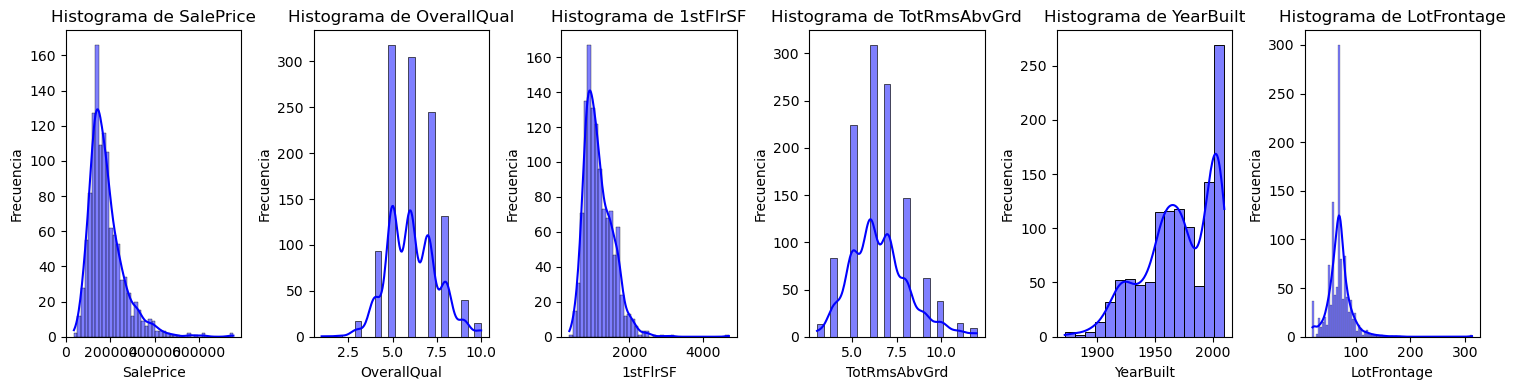

In [6]:
# Creamos las graficas 
fig, axes = plt.subplots(nrows=1, ncols=train_data.shape[1], figsize=(15, 4))

# Histograma para cada columna de nuestro dataframe
for i, ax in enumerate(axes):
    sns.histplot(train_data[:, i], kde=True, ax=ax, color='blue')
    ax.set_title(f'Histograma de {headers[i]}')
    ax.set_xlabel(headers[i])
    ax.set_ylabel('Frecuencia')
    
plt.tight_layout()

# Show the plot
plt.show()


### Coeficientes de correalcion


variable independiente: (1168, 5)


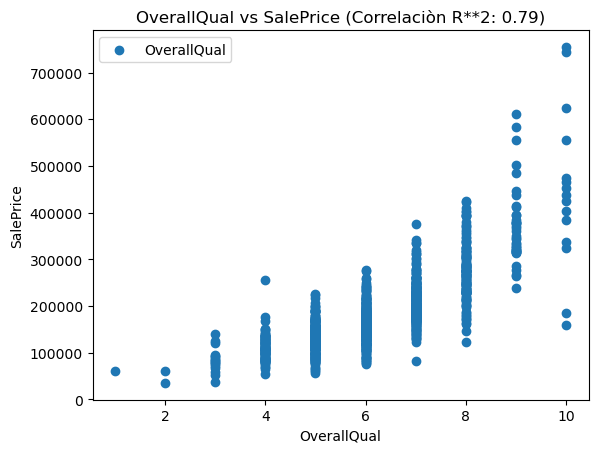

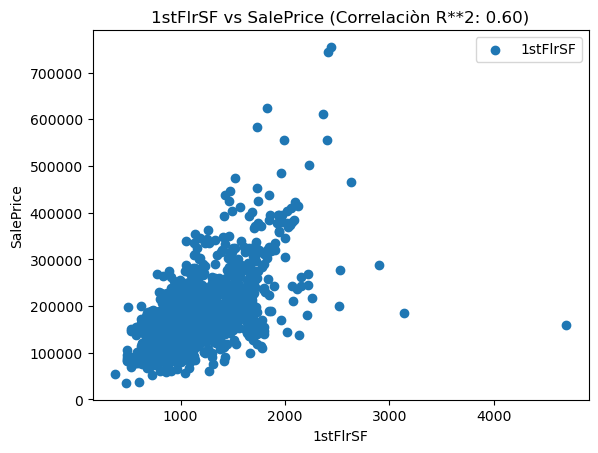

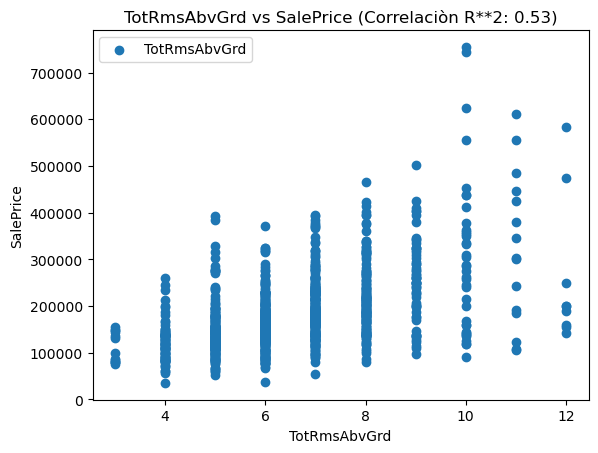

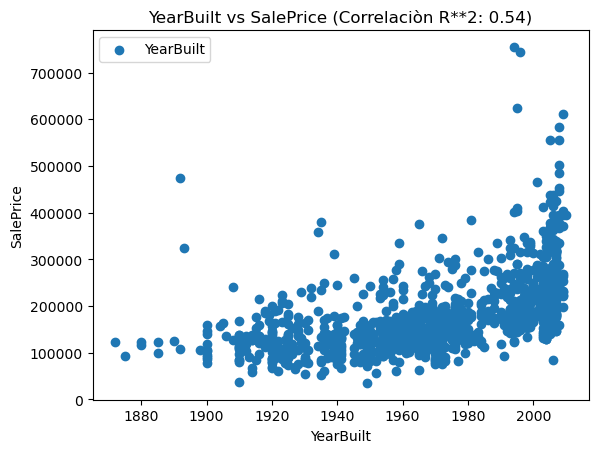

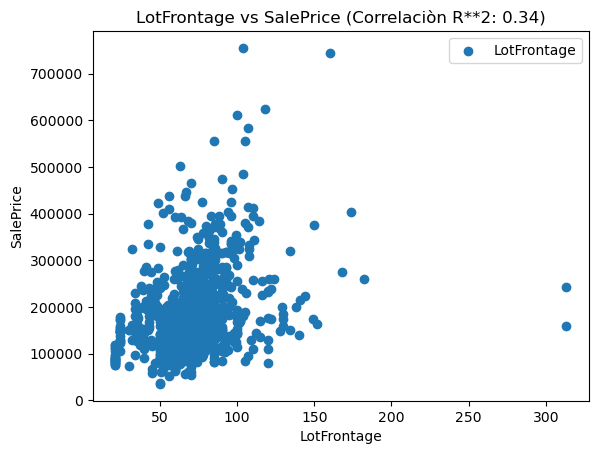

In [7]:
variable_dep= train_data[:, 0]
variable_indep = train_data[:, 1:]
print("variable independiente:", variable_indep.shape)

#Calculamos el coeficiente de correlacion entre cada una de las variables 
for i in range(variable_indep.shape[1]):
    coef_corre = np.corrcoef(variable_indep[:, i], variable_dep)[0, 1]

    # Graficamos
    plt.scatter(variable_indep[:, i], variable_dep, label=headers[i+1])
    plt.title(f'{headers[i+1]} vs {headers[0]} (Correlaciòn R**2: {coef_corre:.2f})')
    plt.xlabel(headers[i+1])
    plt.ylabel(headers[0])
    plt.legend()
    
    # Show the plot
    plt.show()


#### Las variables que presentan mayor potencial predictivo son: OverllQual y 1stFlrSF


--------------------------------------------------------------------------------------

### Funcion para un modelo de regresion lineal

La relación lineal entre dos variables x (variable independiente) y y (variable dependiente) se representa matemáticamente por:
$$
y = \beta_1 \cdot x + \beta_0
$$

donde $ \beta_1 $ representa la pendiente de la línea recta y $\beta_0$ es la intersección con el eje y.


#### Descenso del gradiente 

El descenso del gradiente es un algoritmo de optimización utilizado para minimizar la función de coste en modelos de regresión lineal. A través de n cantidad de iteraciones, se ajustan los parámetros del modelo (pendiente e intercepto) para encontrar la línea que mejor se ajusta a los datos.

Se utiliza el error cuadrático medio (MSE) como función de coste, que mide el promedio de los cuadrados de los errores entre los valores predichos y los reales.


$$
\epsilon = \frac{1}{2n} \sum_{i=0}^{n} (y - \hat{y})^2
$$

Se calculan las derivadas parciales de la función de coste respecto a la pendiente y al intercepto, lo cual indica cómo cambiar los valores de estos para minimizar $\epsilon$


$$
\frac{\partial \epsilon}{\partial \beta_1} = \frac{1}{n} \sum_{i=0}^{n} ((\hat{y}-y)*x)
$$

$$
\frac{\partial \epsilon}{\partial \beta_0} = \frac{1}{n} \sum_{i=0}^{n} ((\hat{y}-y))
$$


Posteriormente los parámetros se actualizan iterativamente en la dirección opuesta al gradiente, multiplicado por la tasa de aprendizaje para alcanzar el mínimo de la función de coste.

$$
\beta_1 := \beta_1  - \alpha \frac{\partial \epsilon}{\partial \beta_1}
$$

$$
\beta_2 := \beta_0 - \alpha \frac{\partial \epsilon}{\partial \beta_0}
$$


 Este proceso se repite hasta que la función de coste converge a un mínimo, o hasta que se cumple un criterio de 'parada', como un número máximo de iteraciones.

In [8]:
# Corroboramos el número de filas y columnas en el array train_data
num_rows, num_columns = train_data.shape

# Imprimir el número de elementos
print("Número de filas (observaciones):", num_rows)
print("Número de columnas (variables):", num_columns)


Número de filas (observaciones): 1168
Número de columnas (variables): 6


### La variable elegida para el analisis es: OverllQual

In [9]:
# El array train_data contiene los datos de entrenamiento, la primera columna corresponde a la variable dependiente y las demás son independientes.
variable_dep = train_data[:, 0]  # Variable dependiente (y)
variable_indep = train_data[:, 1]  # Primera variable independiente (x) [:1] OverllQual

# Aseguramos que x sea un array bidimensional (n, 1)
variable_indep = variable_indep.reshape(-1, 1)


### Cremamos la funcion de entrenamiento lineal

In [10]:
def regresion_lineal_train(X, y, epochs, print_error_cada, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Matriz de características con columna de uno
    k = X.shape[0]  # Número de observaciones (datos)
    
    # Inicialización de los parámetros
    beta = np.random.randn(X_b.shape[1], 1)
    error_historico = []
    beta_historico = []
    
    for epoch in range(epochs):
        predictions = X_b.dot(beta)
        errors = y.reshape(-1, 1) - predictions
        error = np.mean(errors**2)
        error_historico.append(error) # Guardamos los valores de beta
        
        # Gradiente
        gradient = -2 / k * X_b.T.dot(errors)
        

        beta -= alpha * gradient
        
        beta_historico.append(beta.copy())
        
        if epoch % print_error_cada == 0:
            print(f"Epoch {epoch + 1}: Error {error}")

    return beta_historico, error_historico

In [11]:
# para observar como se comporta el error en el descenso del gradiente respecto a la epoca
def plot_error_history(error_historico):
    plt.plot(error_historico)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title("Descenso del gradiente, epoch = 1000")
    plt.show()


Epoch 1: Error 39615658269.923454
Epoch 101: Error 2980211714.288141
Epoch 201: Error 2969758546.3483143
Epoch 301: Error 2959506982.594124
Epoch 401: Error 2949451238.6258154
Epoch 501: Error 2939587574.0004153
Epoch 601: Error 2929912319.722963
Epoch 701: Error 2920421876.8816366
Epoch 801: Error 2911112715.309068
Epoch 901: Error 2901981372.269225


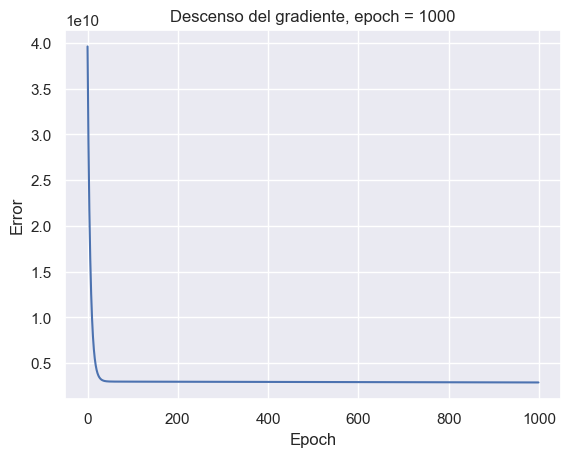

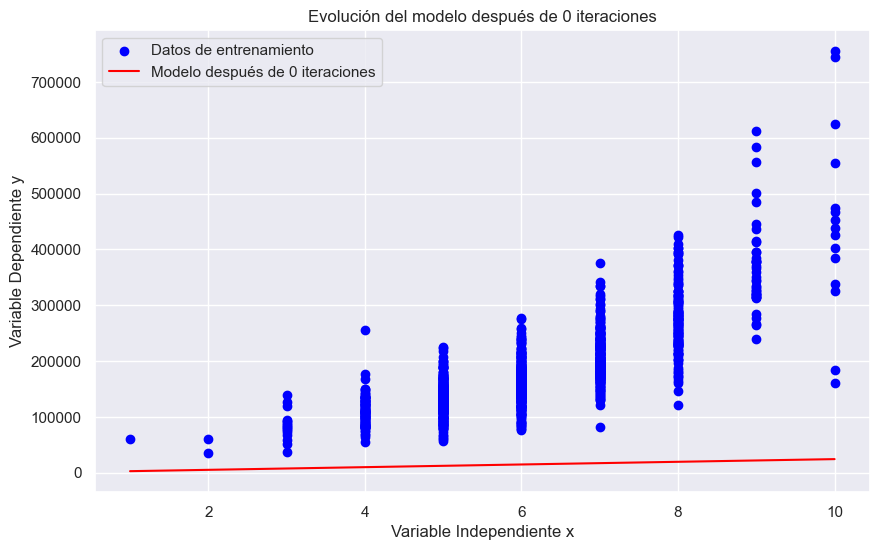

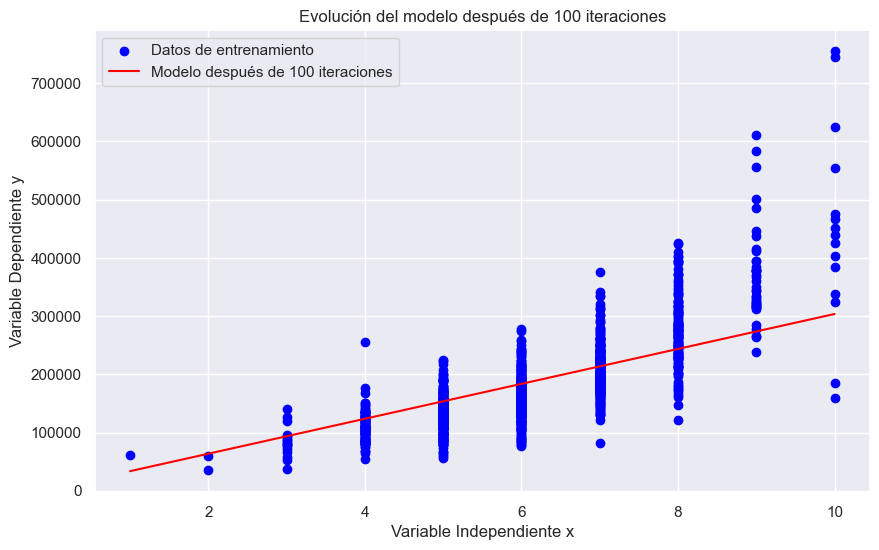

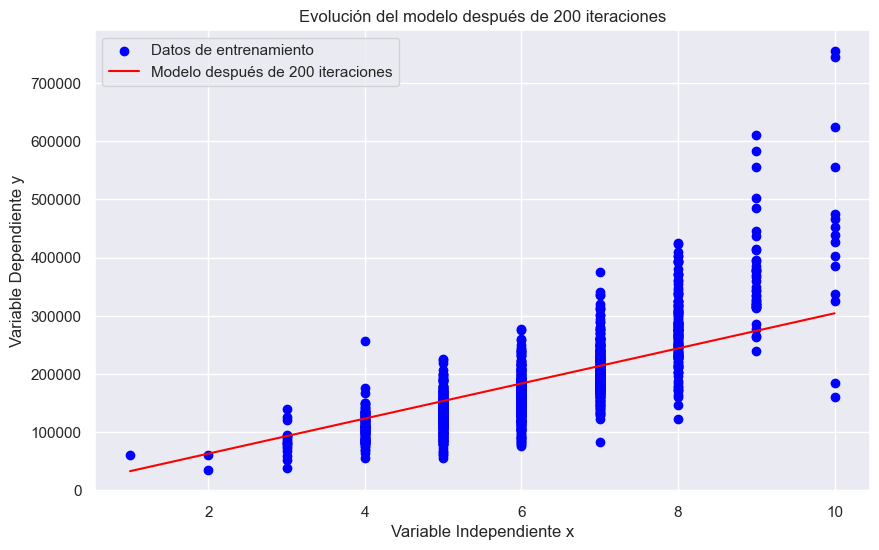

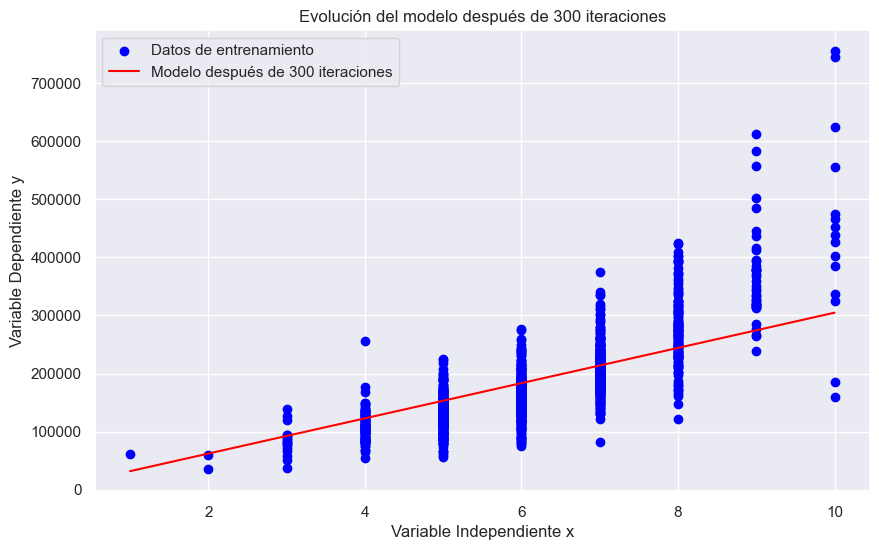

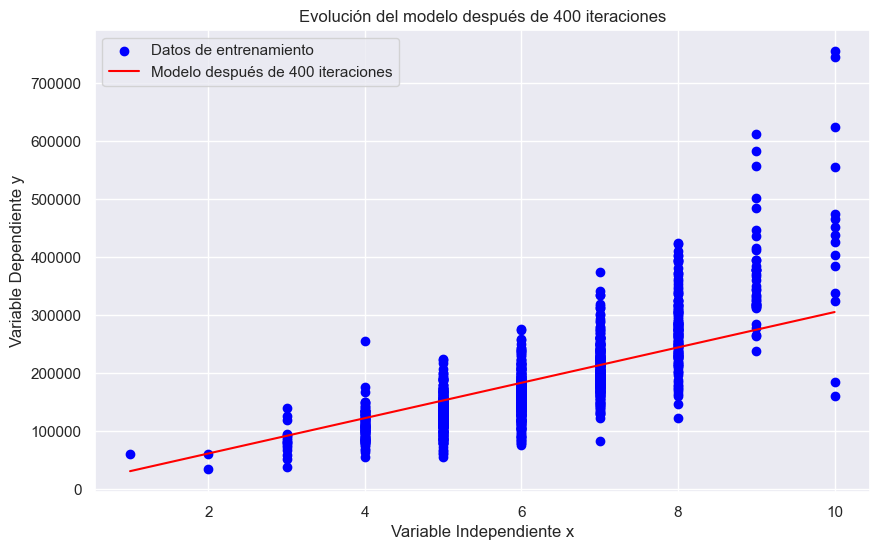

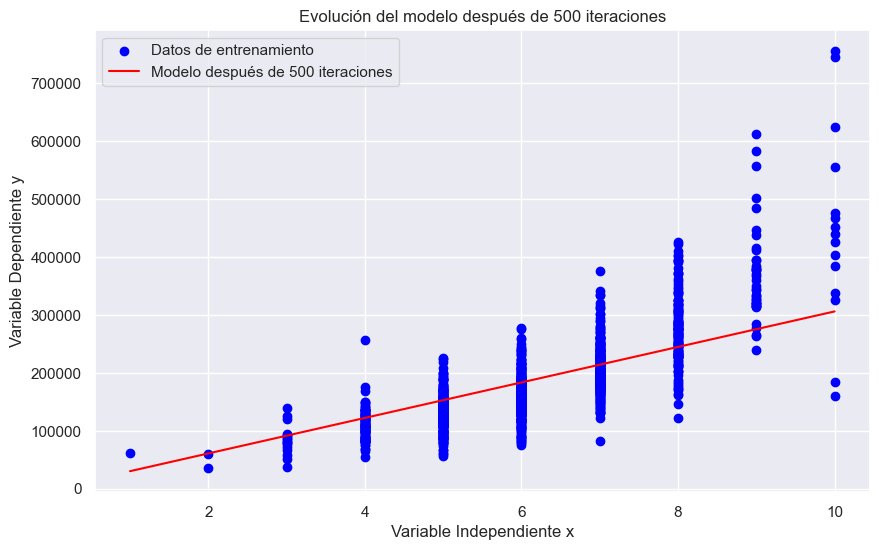

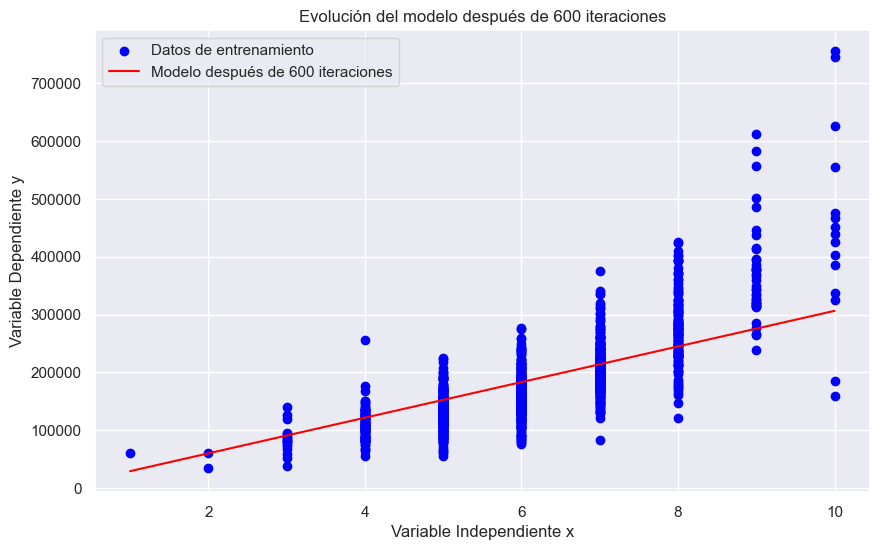

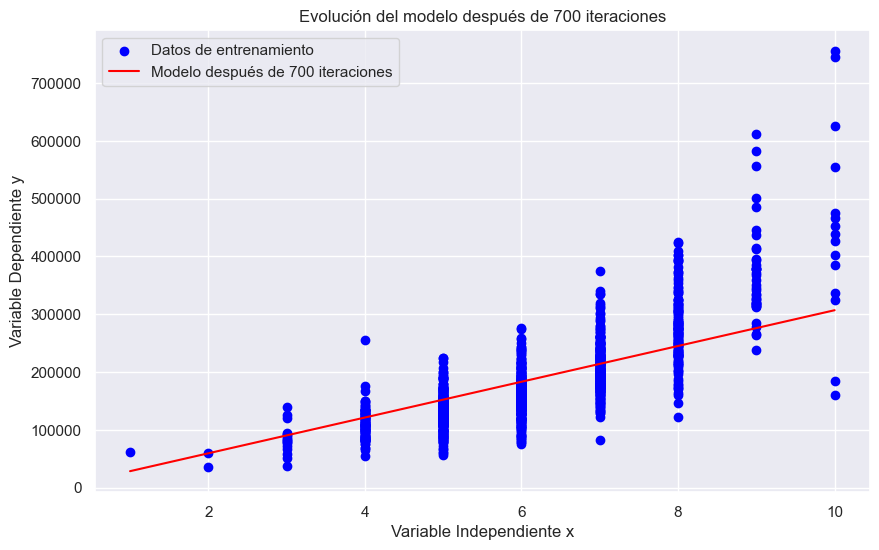

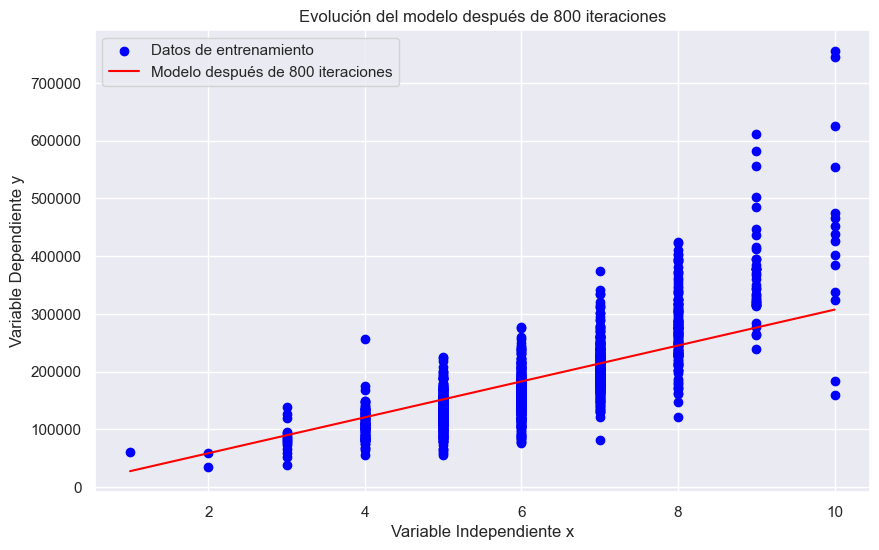

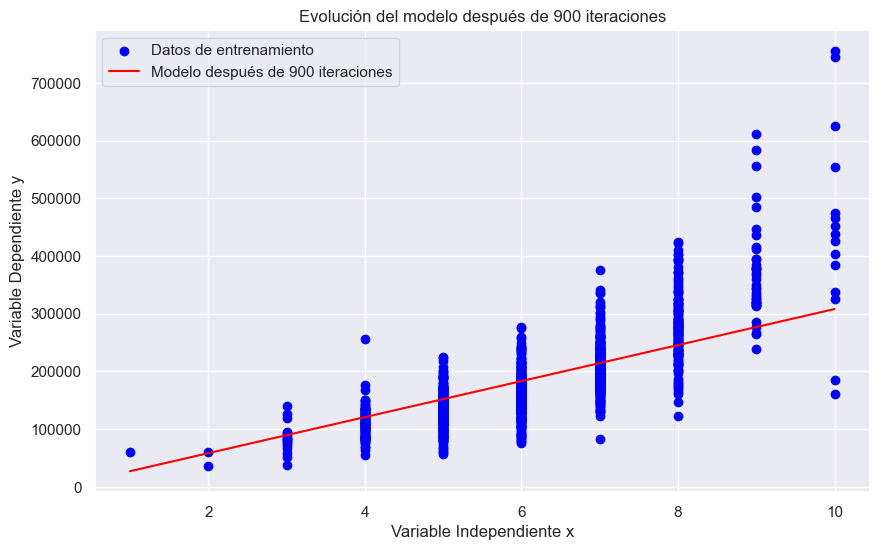

In [12]:
#Estilo dark del grafico
sns.set_theme(style="darkgrid")

def evolucion_temporal_multiple(x, y, beta_historico, print_error_cada):
    x_values = np.linspace(x.min(), x.max(), len(x))
    X_b = np.c_[np.ones((x_values.shape[0], 1)), x_values]
    
    for i, beta in enumerate(beta_historico[::print_error_cada]):
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, color='blue', label='Datos de entrenamiento')
        y_pred = X_b.dot(beta)
        plt.plot(x_values, y_pred, color='red', label=f'Modelo después de {i * print_error_cada} iteraciones')
        plt.xlabel('Variable Independiente x')
        plt.ylabel('Variable Dependiente y')
        plt.title(f'Evolución del modelo después de {i * print_error_cada} iteraciones')
        plt.legend()
        plt.show()

# Parámetros de entrenamiento
epochs = 1000
print_error_cada = 100
alpha = 0.001  # Tasa de aprendizaje

# Entrenamiento del modelo e historial de parámetros y errores
beta_historico, error_historico = regresion_lineal_train(variable_indep, variable_dep, epochs, print_error_cada, alpha)

# Visualización del historial de errores
plot_error_history(error_historico)

# Visualización de la evolución del modelo en el tiempo
evolucion_temporal_multiple(variable_indep, variable_dep, beta_historico, print_error_cada)


### Mostrando el valor de la estimacion luego del entrenamiento

In [13]:
X_test = np.c_[np.ones((variable_indep.shape[0], 1)), variable_indep]

# Utilizamos el último beta obtenido del entrenamiento
beta_final = beta_historico[-1]

# Calculamos los valores estimados
y_estimado = X_test.dot(beta_final)

# Imprime los valores estimados por el modelo y los reales 
for real, estimado in zip(variable_dep, y_estimado):
    print(f"Real: {real}, Estimado: {estimado[0]}")



Real: 158000.0, Estimado: 183100.72171342635
Real: 174000.0, Estimado: 183100.72171342635
Real: 167000.0, Estimado: 151731.3101784999
Real: 136905.0, Estimado: 151731.3101784999
Real: 142953.0, Estimado: 151731.3101784999
Real: 215000.0, Estimado: 245839.54478327924
Real: 217000.0, Estimado: 183100.72171342635
Real: 105000.0, Estimado: 120361.89864357347
Real: 142500.0, Estimado: 183100.72171342635
Real: 171000.0, Estimado: 214470.1332483528
Real: 225000.0, Estimado: 245839.54478327924
Real: 136000.0, Estimado: 183100.72171342635
Real: 155000.0, Estimado: 183100.72171342635
Real: 171000.0, Estimado: 183100.72171342635
Real: 127000.0, Estimado: 151731.3101784999
Real: 175500.0, Estimado: 214470.1332483528
Real: 127500.0, Estimado: 183100.72171342635
Real: 173000.0, Estimado: 183100.72171342635
Real: 84900.0, Estimado: 120361.89864357347
Real: 125000.0, Estimado: 151731.3101784999
Real: 95000.0, Estimado: 151731.3101784999
Real: 184750.0, Estimado: 308578.3678531321
Real: 80000.0, Estima

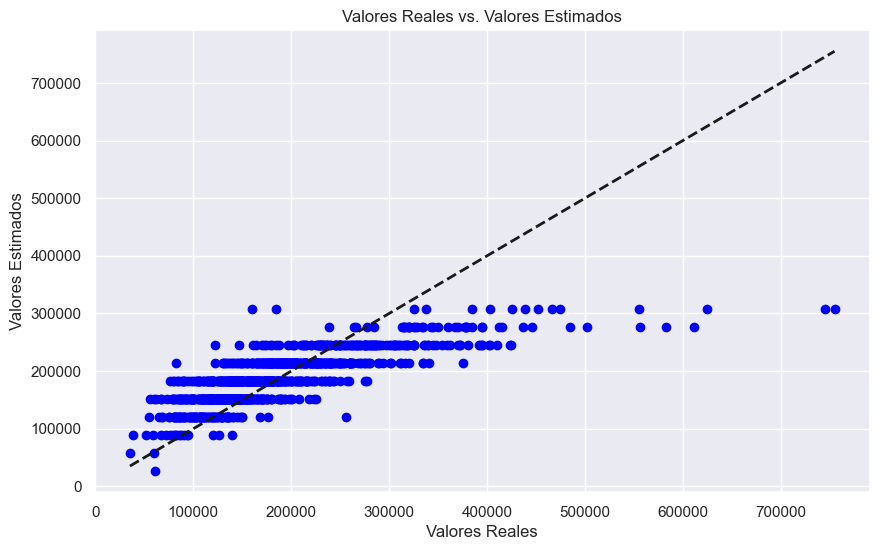

In [14]:
##Agrego esta grafica de dispersion para visualizar los valores reales y los valores estimados (Que mas adelante vamos a ver con metricas)
# Valores reales
y_real = variable_dep

# Valores estimados
y_estimado = X_test.dot(beta_final).flatten()

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_estimado, color='blue')  # Puntos de datos
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)  # Línea y=x
plt.xlabel('Valores Reales')
plt.ylabel('Valores Estimados')
plt.title('Valores Reales vs. Valores Estimados')
plt.show()


## Entrenando modelo de regresion lineal con scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = train_data[:, 1].reshape(-1, 1)  # variables independientes
y = train_data[:, 0]  # La variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Predicciones del conjunto de prueba
y_pred = model.predict(X_test)

In [16]:
# Imprimimos los primeros 10 valores reales y predichos para una mejor visualizacion
n = 10  
for real, pred in zip(y_test[:n], y_pred[:n]):
    print(f'Real: {real}, Estimado: {pred}')


Real: 135000.0, Estimado: 130779.23911036618
Real: 110000.0, Estimado: 84898.25959939786
Real: 128000.0, Estimado: 176660.21862133444
Real: 230000.0, Estimado: 268422.17764327105
Real: 175000.0, Estimado: 130779.23911036618
Real: 263435.0, Estimado: 268422.17764327105
Real: 392500.0, Estimado: 268422.17764327105
Real: 80500.0, Estimado: 84898.25959939786
Real: 139950.0, Estimado: 130779.23911036618
Real: 128000.0, Estimado: 176660.21862133444


### Función que estima la predicción promedio entre el modelo manual  y el modelo con sklearn

In [17]:
# Función para estimar las predicciones y calcular promedio
def promedio_predicciones(x_nuevo, beta_manual, modelo_sklearn):
    X_nuevo = np.array(x_nuevo).reshape(-1, 1)
    
    # Añadir columna de unos para el intercepto para el modelo manual
    X_nuevo_b = np.c_[np.ones((X_nuevo.shape[0], 1)), X_nuevo]
    
    # Predicción del modelo manual 
    pred_manual = X_nuevo_b.dot(beta_manual).flatten()
    
    # Predicción con el modelo de scikit-learn
    pred_sklearn = modelo_sklearn.predict(X_nuevo).flatten()
    
    # Promedio de las predicciones de los dos modelos
    pred_promedio = (pred_manual + pred_sklearn) / 2
    
    return pred_manual, pred_sklearn, pred_promedio


x_nuevo = train_data[:, 1]  # Reemplazamos con la columna de interes en este caso corresponde a: OverallQual

# beta_historico  contiene los parámetros del modelo manual entrenado
beta_final = beta_historico[-1]

# modelo entrenado con scikit-learn
modelo_sklearn = LinearRegression().fit(variable_indep, variable_dep)

# Llamamos a la funcion
predicciones_manual, predicciones_sklearn, predicciones_promedio = promedio_predicciones(
    x_nuevo, 
    beta_final, 
    modelo_sklearn
)

In [18]:
# Imprimimos las primeras 10 predicciones para visualizar mejor
N = 10 
print(f"{'Real':<20}{'Manual':<20}{'Sklearn':<20}{'Promedio':<20}")
for i in range(N):
    print(f"{variable_dep[i]:<20.4f}{predicciones_manual[i]:<20.4f}{predicciones_sklearn[i]:<20.4f}{predicciones_promedio[i]:<20.4f}")


Real                Manual              Sklearn             Promedio            
158000.0000         183100.7217         176888.7859         179994.7538         
174000.0000         183100.7217         176888.7859         179994.7538         
167000.0000         151731.3102         130470.2400         141100.7751         
136905.0000         151731.3102         130470.2400         141100.7751         
142953.0000         151731.3102         130470.2400         141100.7751         
215000.0000         245839.5448         269725.8778         257782.7113         
217000.0000         183100.7217         176888.7859         179994.7538         
105000.0000         120361.8986         84051.6940          102206.7963         
142500.0000         183100.7217         176888.7859         179994.7538         
171000.0000         214470.1332         223307.3318         218888.7325         


### Utilizando el conjunto de datos de validación 

In [19]:
# Variables independientes y dependiente del conjunto de validación
x_validation = test_validation[:, 1]  
y_validation = test_validation[:, 0]  

# Predicciones con ambos modelos y el promedio
pred_manual_validation, pred_sklearn_validation, pred_promedio_validation = promedio_predicciones(
    x_validation, 
    beta_historico[-1], 
    modelo_sklearn
)


### Calculamos los errores para cada modelo 

In [20]:
# MSE para el modelo manual
mse_manual = mean_squared_error(y_validation, pred_manual_validation)

# MSE para el modelo de scikit-learn
mse_sklearn = mean_squared_error(y_validation, pred_sklearn_validation)

#MSE para el promedio de las predicciones
mse_promedio = mean_squared_error(y_validation, pred_promedio_validation)

print(f"MSE Manual: {mse_manual}")
print(f"MSE Scikit-learn: {mse_sklearn}")
print(f"MSE Promedio: {mse_promedio}")


MSE Manual: 2263708003.789774
MSE Scikit-learn: 2083296718.7347295
MSE Promedio: 2064541775.8431196


### Graficamos los errores de cada modelo para comparar 

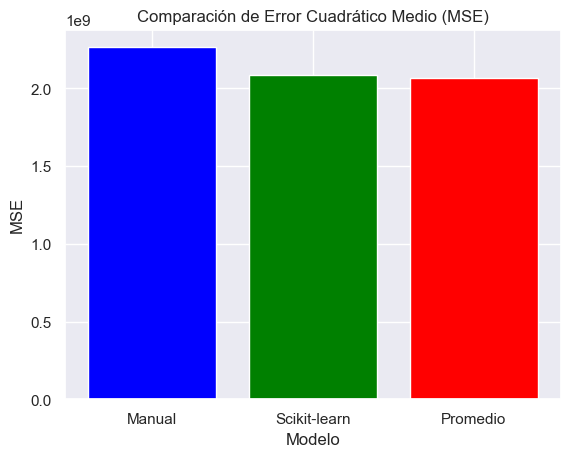

In [21]:
# Datos para el gráfico
modelos = ['Manual', 'Scikit-learn', 'Promedio']
errores = [mse_manual, mse_sklearn, mse_promedio]

# Crear gráfico de barras
plt.bar(modelos, errores, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de Error Cuadrático Medio (MSE)')
plt.show()


In [24]:
min_error = min(errores)
best_model = modelos[errores.index(min_error)]

print(f"El mejor modelo (minimo error) es el Scikit-learn con un valor de MSE de {min_error}")


El mejor modelo (minimo error) es el Scikit-learn con un valor de MSE de 2064541775.8431196


###  La segunda variable elegida para la estimacion es: 1stFlrSF

Epoch 1: Error 69108018856.04776


C:\Users\mmcastep\AppData\Local\Temp\ipykernel_16216\2208710428.py:13: RuntimeWarning: overflow encountered in square
  error = np.mean(errors**2)
C:\Users\mmcastep\AppData\Local\Temp\ipykernel_16216\2208710428.py:20: RuntimeWarning: invalid value encountered in subtract
  beta -= alpha * gradient


Epoch 1001: Error nan
Epoch 2001: Error nan
Epoch 3001: Error nan
Epoch 4001: Error nan
Epoch 5001: Error nan
Epoch 6001: Error nan
Epoch 7001: Error nan
Epoch 8001: Error nan
Epoch 9001: Error nan


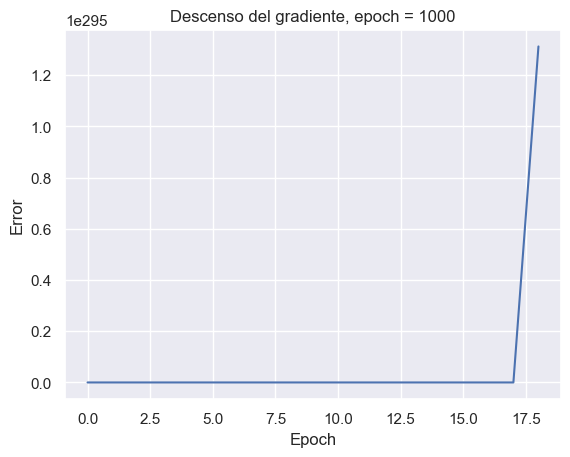

ValueError: Input contains NaN.

In [23]:
# Parámetros de entrenamiento
epochs = 10000
print_error_cada = 1000
alpha = 0.001  # Tasa de aprendizaje

# Estilo dark del gráfico
sns.set_theme(style="darkgrid")

# El array train_data contiene los datos de entrenamiento, la primera columna corresponde a la variable dependiente
variable_dep = train_data[:, 2]  # Variable dependiente (y)

# Indices de las variables independientes 
variables_indep_indices = [0]

# Iterar sobre las variables independientes seleccionadas
for index in variables_indep_indices:
    # Separar la variable independiente actual
    variable_indep = train_data[:, index].reshape(-1, 1)
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(variable_indep, variable_dep, test_size=0.2, random_state=42)
    
    # Entrenamiento del modelo manual
    beta_historico, error_historico = regresion_lineal_train(X_train, y_train, epochs, print_error_cada, alpha)
    
    # Visualización del historial de errores
    plot_error_history(error_historico)
    
    # Entrenamiento del modelo de scikit-learn
    modelo_sklearn = LinearRegression()
    modelo_sklearn.fit(X_train, y_train)
    
    # Separar la variable independiente y dependiente del conjunto de validación
    x_validation_actual = test_validation[:, index].reshape(-1, 1)
    y_validation_actual = test_validation[:, 2]  # Asume que la variable dependiente está en la primera columna

    # Predicciones con ambos modelos y el promedio
    pred_manual_validation, pred_sklearn_validation, pred_promedio_validation = promedio_predicciones(
        x_validation_actual, 
        beta_historico[-1], 
        modelo_sklearn
    )
    
    # Calcular errores
    mse_manual_actual = mean_squared_error(y_validation_actual, pred_manual_validation)
    mse_sklearn_actual = mean_squared_error(y_validation_actual, pred_sklearn_validation)
    mse_promedio_actual = mean_squared_error(y_validation_actual, pred_promedio_validation)

    # Graficar errores para la variable actual
    plt.figure()
    plt.bar(['Manual', 'Scikit-learn', 'Promedio'], [mse_manual_actual, mse_sklearn_actual, mse_promedio_actual], color=['blue', 'green', 'red'])
    plt.xlabel('Modelo')
    plt.ylabel('MSE')
    plt.title(f'Comparación de MSE para variable independiente {index}')
    plt.show()
